# Plot CR effect: transmon-transmon vs transmon-fluxonium in the linear approximation

In [52]:
import numpy as np
import time
import scipy.interpolate
import matplotlib.pyplot as plt
from typing import List, Dict, Callable
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import copy
import json

from IPython.display import display, Latex

In [53]:
tex_rc_params = {
    'backend': 'ps',
    #'text.latex.preamble': [r'\usepackage{gensymb}'],
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    #'text.usetex': True,
    'font.family': 'serif',
}

%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

In [54]:
with open("data_cr_transmon_transmon/data_cr_transmon_transmon_linear.txt") as file_data:
    result_tt = json.load(file_data)
with open("data_cr_transmon_fluxonium/data_cr_transmon_fluxonium_linear.txt") as file_data:
    result_tf = json.load(file_data)

In [55]:
def plot_cr_tt_tf(
    result_tt: List[dict],
    result_tf: List[dict],
    tex_rc_params: dict,
    save: bool=False  
):
    with plt.rc_context(tex_rc_params):
        fig, axs = plt.subplots(
            nrows = 2, 
            figsize=(3.39, 5.237838054655359), 
            constrained_layout=True
        )
        freq = []
        gate_time_tt = []
        gate_time_tf = []
        zz_tt = []
        zz_tf = []
        for res_tt, res_tf in zip(result_tt, result_tf):
            freq.append(res_tt["freq"])

            gate_time_tt.append(res_tt["gate_time_sw"])
            gate_time_tf.append(res_tf["gate_time_sw"])
            zz_tt.append(np.abs(res_tt["zz"])*1e3 )
            zz_tf.append(np.abs(res_tf["zz"])*1e3)
        
        cmap_blue = matplotlib.cm.get_cmap('Blues')
        cmap_red = matplotlib.cm.get_cmap('Reds')


        colors = {"tt": cmap_blue(1.0), "tf": cmap_red(0.8)}

        axs[0].semilogy(freq, gate_time_tt, linestyle="--", color=colors["tt"], 
                       label="Transmon-transmon")
        axs[0].semilogy(freq, gate_time_tf, linestyle="-", color=colors["tf"], 
                       label="Transmon-fluxonium")
        axs[1].plot(freq, zz_tt, linestyle="--", 
                   color=colors["tt"], label="Transmon-transmon")
        axs[1].plot(freq, zz_tf, linestyle="-", color=colors["tf"], 
                   label="Transmon-fluxonium")
        
        axs[1].set_xlabel("$\omega_t/2 \pi \, (\mathrm{GHz})$")
        x_ticks = [4.2 + 0.2*x for x in range(9)]
        axs[0].set_ylim(100, 10000)
        axs[1].set_ylim(0.0, 350)
        x_ticks = [4.2 + 0.2*x for x in range(9)]
        axs[0].set_xticks(x_ticks)
        axs[1].set_xticks(x_ticks)
        x_ticks_latex = ['$' + str(x)[:3] + '$' for x in x_ticks]
        axs[0].set_xticklabels(x_ticks_latex)
        axs[1].set_xticklabels(x_ticks_latex)
        y_ticks = [100, 1000, 10000]
        axs[0].set_yticks(y_ticks)
        y_ticks_latex = ['$10^2$', '$10^3$', '$10^4$']
        axs[0].set_yticklabels(y_ticks_latex)
        y_ticks = [0 + 50*x for x in range(8)]
        axs[1].set_yticks(y_ticks)
        y_ticks_latex = ['$0$', '$50$', '$100$', "$150$", "$200$", "$250$", "$300$", "$350$"]
        axs[1].set_yticklabels(y_ticks_latex)
        axs[0].tick_params(axis='both')
        axs[1].tick_params(axis='both')
        axs[0].set_ylabel("$t_{\\mathrm{gate}}^{(\mathrm{id})} \, (\\mathrm{ns})$")
        axs[1].set_ylabel("$|\\xi_{ZZ}|/2 \pi  \, (\\mathrm{kHz})$")
        axs[0].legend(loc='upper center')
        axs[1].legend(loc='upper center')
        if save:
            plt.savefig("tt_tf_cr_time_zz.svg")
            plt.savefig("tt_tf_cr_time_zz.pdf")
        plt.show()


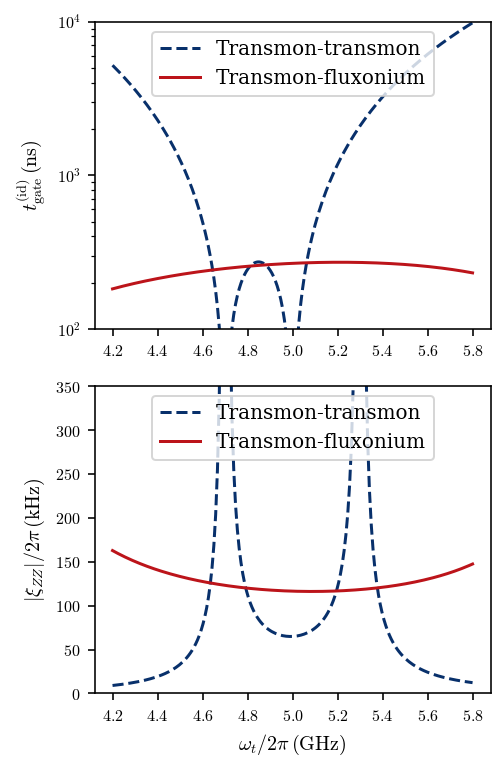

In [56]:
plot_cr_tt_tf(result_tt, result_tf, tex_rc_params, save=True)